# Public Saftey Metric

### By Benjamin Solomon

When posed with the task, "find the best neighborhood", I had to first come up with what it would mean to be the best. One thing that is important for me is peace of mind. This correlates to how safe a given neighborhood is, which in turn correlates to the crime rates in each neighborhood. Luckily, there is a great dataset provided by the WPRDC that covers just that. So, I will be attempting to determine the best neighborhood by analyzing data about crime.

*This dataset describes the number and type of crimes in each neighboorhood, as well as the overall population of each.*

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

*Here is a sample of the dataset. It is a list of neighborhood and crimes, with numbers marking how many of each crime type occured in each neighborhood. It also shows how many crimes were commited as a ratio to total population*

In [2]:
# load in the crime info file
crimes = pd.read_csv("public-safety.csv")

# look at the first ten rows of the data
crimes.sample(10)

,Neighborhood,Sector #,Population (2010),#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
3,Arlington,7,"1,869",50,84,48,2.7,4.5,0,1,8,5,15,7,9
4,Arlington Heights,7,244,19,37,24,7.8,15.2,0,0,4,5,5,3,7
27,East Hills,11,"3,169",90,136,88,2.8,4.3,0,0,13,16,25,11,18
64,Polish Hill,13,"1,274",34,39,40,2.7,3.1,1,0,3,3,6,8,11
56,North Shore,16,303,72,68,43,23.8,22.4,0,0,1,6,7,5,8
66,Ridgemont,4,483,14,15,7,2.9,3.1,0,0,0,1,3,0,2
51,Morningside,12,"3,346",67,91,65,2.0,2.7,0,0,2,2,21,15,12
8,Beltzhoover,6,"1,925",83,131,85,4.3,6.8,1,0,6,10,28,8,38
40,Homewood North,11,"3,280",198,190,135,6.0,5.8,3,3,14,33,68,24,23
45,Lincoln Place,8,"3,227",32,63,33,1.0,2.0,0,0,1,3,11,2,0


There's a column that is not of much practical use for our given metric, such as Sector #. Thus, we can go ahead and get rid of that column. Additionally, I do not plan on taking population size into consideration, so I can get rid of those columns too.

In [3]:
del crimes["Sector #"]
del crimes["Population (2010)"]
del crimes["Part 1 Crime per 100 Persons (2010)"]
del crimes["Part 2 Crime per 100 Persons (2010)"]


crimes.sample(10)

,Neighborhood,#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
55,North Oakland,182,136,160,0,0,16,7,35,13,12
26,East Carnegie,9,11,11,0,0,0,1,5,0,0
53,Mt. Oliver,12,28,16,0,1,0,4,1,3,2
40,Homewood North,198,190,135,3,3,14,33,68,24,23
89,Windgap,41,40,28,1,0,4,1,8,7,5
69,South Oakland,104,110,87,0,1,2,3,37,19,13
29,Elliott,105,165,97,2,0,18,7,22,10,23
54,New Homestead,7,4,9,0,0,0,0,1,2,1
67,Shadyside,623,308,285,0,1,24,10,60,53,14
85,Upper Lawrenceville,92,184,73,0,0,12,9,24,12,29


*Some of the crimes recorded are worse than others. To reflect this in my analysis, I will weight the different columns accordingly. Severity based on typical jail sentence length for each crime*

In [4]:
#major crimes are weighted twice as heavily
crimes["#Part 1 (Major Crime) Reports (2010)"]=crimes["#Part 1 (Major Crime) Reports (2010)"]*2
#Non major crime reports stay as is (redundant to write here)
crimes["#Part 2 Reports (2010)"]=crimes["#Part 2 Reports (2010)"]*1
#other police reports are only weighted 0.6 as much
crimes["#Other Police Reports (2010)"]=crimes["#Other Police Reports (2010)"]*0.6
#murder reports are weighted as 3 times as important
crimes["#Murder (2010)"]=crimes["#Murder (2010)"]*3
#rape is similarly weighted 3 times as important
crimes["#Rape (2010)"]=crimes["#Rape (2010)"]*3
#robbery is moved down to 0.6 times as important
crimes["#Robbery (2010)"]=crimes["#Robbery (2010)"]*0.6
#Agr. Assult will be weighted by 1.5
crimes["#Agr. Assault (2010)"]=crimes["#Agr. Assault (2010)"]*1.5
#Burglary will remain the same at 1
crimes["#Burglary (2010)"]=crimes["#Burglary (2010)"]*1
#Auto theft will be slightly higher than burglary at 1.5
crimes["#Auto Theft (2010)"]=crimes["#Auto Theft (2010)"]*1.5
#Drug violations will be weighted at only 0.5
crimes["#Drug Violations (2010)"]=crimes["#Drug Violations (2010)"]*0.5


crimes.sample(10)

,Neighborhood,#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
21,Chateau,32,24,28.8,0,0,0.6,0.0,0,3.0,7.0
17,Central Lawrenceville,354,231,101.4,0,3,10.8,18.0,25,51.0,20.0
46,Lincoln-Lemington-Belmar,266,176,67.8,0,0,11.4,19.5,34,28.5,7.5
11,Bon Air,52,55,22.8,0,0,0.6,6.0,7,1.5,5.5
51,Morningside,134,91,39.0,0,0,1.2,3.0,21,22.5,6.0
66,Ridgemont,28,15,4.2,0,0,0.0,1.5,3,0.0,1.0
69,South Oakland,208,110,52.2,0,3,1.2,4.5,37,28.5,6.5
36,Greenfield,290,170,91.8,0,6,4.2,9.0,43,22.5,11.5
19,Central Oakland,472,164,83.4,0,3,13.8,12.0,66,21.0,3.5
62,Point Breeze,232,72,40.8,0,0,3.6,4.5,29,6.0,6.5


*Now, lets add up all the weighted crimes to see what the total crime count for each neighborhood is*

In [5]:
crime_totals = pd.DataFrame([],
                 index=[crimes['Neighborhood']],
                 columns=['Total Crime'])

total=crimes.sum(axis=1)   

i=0 
length=len(crime_totals)

while(i<length):
    crime_totals['Total Crime'].iloc[i]=total[i]
    i+=1;

crime_totals.sample(10)

,Total Crime
Neighborhood,
Allegheny Center,360.5
Strip District,656.4
Banksville,270.3
Ridgemont,52.7
Swisshelm Park,84.2
Squirrel Hill North,549.4
Allentown,813
Arlington Heights,112.3
Point Breeze North,311.2


*To view the data more easily, I sort the data so that neighborhood with the most crime is on the left, and least on the right.*

In [6]:
crime_totals=crime_totals.sort_values(by=['Total Crime'], ascending=False)

*Now, I just need to print out my results to see what the best neighborhood is based on my analysis*

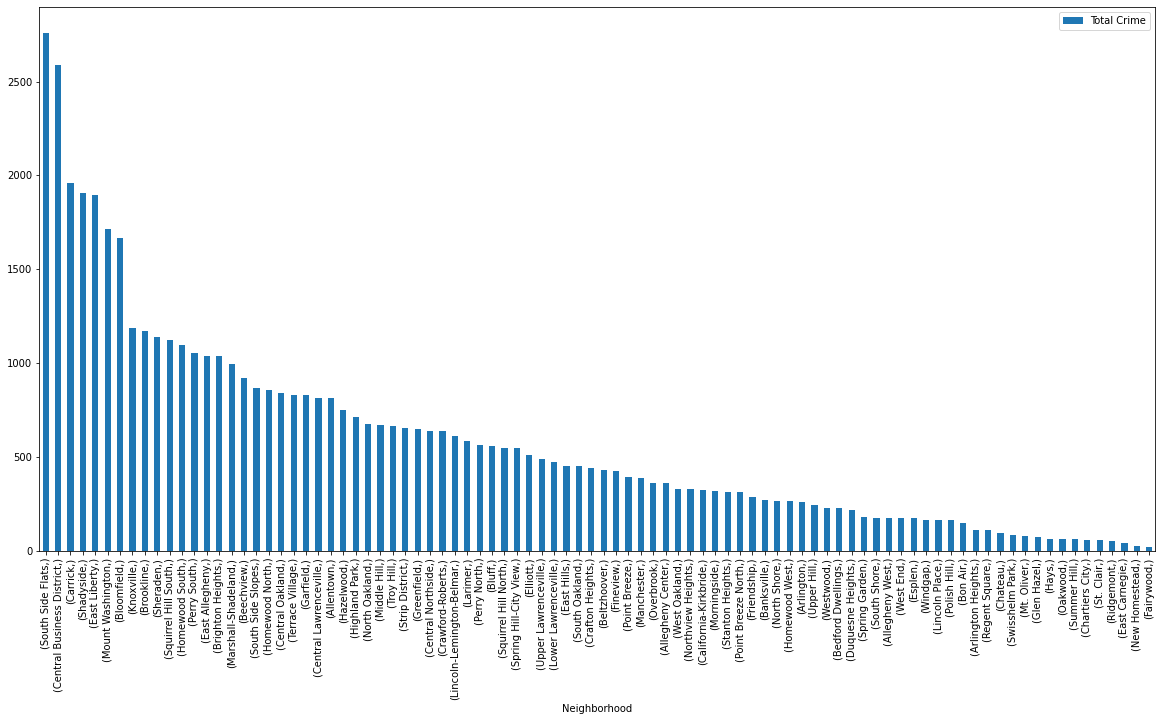

In [7]:
crime_totals.plot.bar(figsize=(20,10),stacked=True)